[View in Colaboratory](https://colab.research.google.com/github/findingfoot/ML_practice-codes/blob/master/Loss_functions_in_linear_regression.ipynb)

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

sess = tf.Session()

In [0]:
iris = datasets.load_iris()

In [28]:
'''
iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
equation to solve : y = Ax+b
where x is the petal width and y is the sepal length
'''

'\niris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]\nequation to solve : y = Ax+b\nwhere x is the petal width and y is the sepal length\n'

In [0]:
x_vals = np.array([x[3] for x in iris.data]) # petal width
y_vals = np.array([x[0] for x in iris.data]) #sepal length


In [0]:
# we need a batch size

batch_size = 25
learning_rate = 0.25
iterations = 50

In [0]:
#placeholder for the data and target

x_data = tf.placeholder(shape = [None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)

#We also need variables like A and b in our case here

A = tf.Variable(tf.random_normal(shape = [1,1]))
b = tf.Variable(tf.random_normal(shape = [1,1]))


In [0]:
#Model operations

model_output = tf.add((tf.matmul(x_data, A)), b)

#Loss function

l1_loss = tf.reduce_mean(tf.abs(y_target - model_output))

In [0]:
#optimizer

my_opt_l1 = tf.train.GradientDescentOptimizer(learning_rate)
train_step_l1 = my_opt.minimize(l1_loss)

#initialize the variables

init = tf.global_variables_initializer()
sess.run(init)


In [44]:
loss_vec_l1 = []
for i in range(iterations):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step_l1, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss_l1 = sess.run(l1_loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec_l1.append(temp_loss_l1)
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
    

Step #25 A = [[1.6639633]] b = [[1.9827298]]
Step #50 A = [[2.171163]] b = [[2.7327297]]


In [0]:
# L2 Loss
# Reinitialize graph
ops.reset_default_graph()

# Create graph
sess = tf.Session()

In [0]:

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

In [0]:

# Declare loss functions
loss_l2 = tf.reduce_mean(tf.square(y_target - model_output))

# Declare optimizers
my_opt_l2 = tf.train.GradientDescentOptimizer(learning_rate)
train_step_l2 = my_opt_l2.minimize(loss_l2)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [48]:
loss_vec_l2 = []
for i in range(iterations):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step_l2, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss_l2 = sess.run(loss_l2, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec_l2.append(temp_loss_l2)
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))

Step #25 A = [[1.0218471]] b = [[4.608951]]
Step #50 A = [[0.8732168]] b = [[4.754912]]


In [0]:
from jupyterthemes import jtplot

jtplot.style()

jtplot.style(theme='solarizedd')

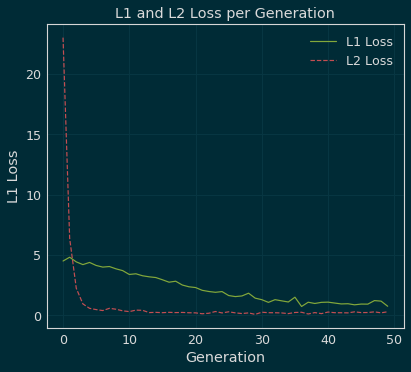

In [51]:
# Plot loss over time
plt.plot(loss_vec_l1, 'g-', label='L1 Loss')
plt.plot(loss_vec_l2, 'r--', label='L2 Loss')
plt.title('L1 and L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L1 Loss')
plt.legend(loc='upper right')
plt.show()